In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HINDUNILVR.csv" , encoding = "ISO-8859-1")
df.shape

(738, 7)

In [3]:
df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,1632.699951,1640.400024,1604.000000,1610.300049,1542.822388,1423511.0
2018-09-11,1613.000000,1624.000000,1576.050049,1590.650024,1523.995728,2381214.0
2018-09-12,1599.949951,1636.900024,1587.500000,1626.849976,1558.678955,1789295.0
2018-09-14,1637.900024,1649.000000,1612.500000,1629.300049,1561.026367,1920969.0
2018-09-17,1620.000000,1626.000000,1595.000000,1605.449951,1538.175537,904395.0
...,...,...,...,...,...,...
2021-09-02,2748.000000,2810.000000,2730.149902,2801.050049,2801.050049,1946183.0
2021-09-03,2802.199951,2808.750000,2756.000000,2766.699951,2766.699951,1561823.0
2021-09-06,2790.000000,2825.000000,2775.300049,2780.600098,2780.600098,1444978.0


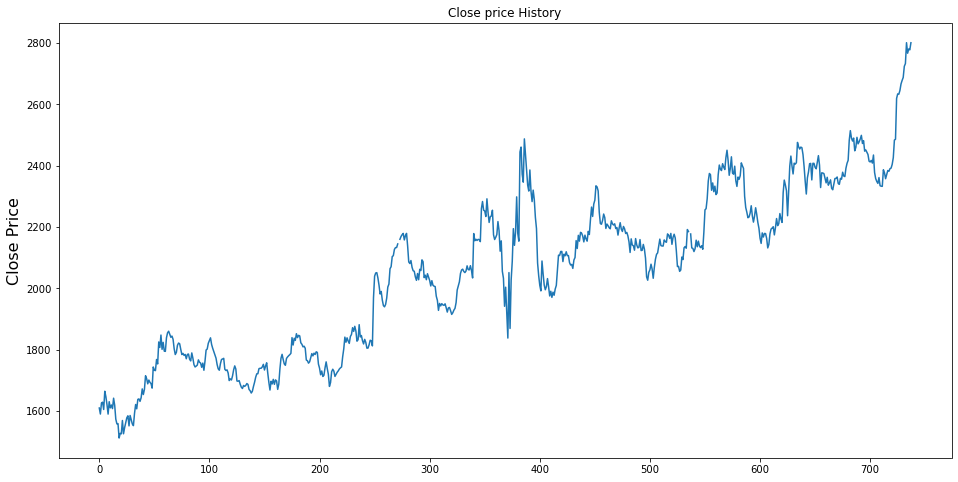

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.ylabel('Close Price', fontsize=16)
plt.show()

In [5]:
df1 = df.dropna(how="any")

In [6]:
data1 = df1.filter(['Close'])
len(data1)

736

In [7]:
data = data1.values
data

array([[1610.300049],
       [1590.650024],
       [1626.849976],
       [1629.300049],
       [1605.449951],
       [1664.949951],
       [1647.099976],
       [1621.300049],
       [1590.449951],
       [1630.849976],
       [1610.75    ],
       [1620.099976],
       [1608.400024],
       [1642.300049],
       [1618.849976],
       [1573.949951],
       [1558.550049],
       [1559.349976],
       [1512.449951],
       [1527.650024],
       [1526.099976],
       [1569.599976],
       [1526.300049],
       [1546.199951],
       [1562.      ],
       [1578.400024],
       [1584.900024],
       [1552.050049],
       [1585.949951],
       [1571.550049],
       [1558.25    ],
       [1552.900024],
       [1593.050049],
       [1621.699951],
       [1607.650024],
       [1638.449951],
       [1640.050049],
       [1631.949951],
       [1643.849976],
       [1672.599976],
       [1654.300049],
       [1671.099976],
       [1715.5     ],
       [1706.050049],
       [1689.099976],
       [17

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.07593519],
       [0.06068607],
       [0.08877853],
       [0.09067988],
       [0.07217134],
       [0.11834548],
       [0.10449326],
       [0.08447159],
       [0.0605308 ],
       [0.09188268],
       [0.07628437],
       [0.08354029],
       [0.07446071],
       [0.10076834],
       [0.08257024],
       [0.04772621],
       [0.03577533],
       [0.03639611],
       [0.        ],
       [0.0117958 ],
       [0.01059291],
       [0.04435047],
       [0.01074817],
       [0.02619121],
       [0.03845262],
       [0.05117963],
       [0.05622386],
       [0.0307311 ],
       [0.05703864],
       [0.0458638 ],
       [0.03554248],
       [0.03139071],
       [0.06254857],
       [0.08478193],
       [0.07387868],
       [0.09778053],
       [0.09902226],
       [0.0927363 ],
       [0.10197114],
       [0.12428218],
       [0.11008078],
       [0.12311812],
       [0.15757414],
       [0.15024064],
       [0.13708677],
       [0.14663205],
       [0.14088936],
       [0.137

In [9]:
train_data_len = math.ceil(len(data) * 0.80)
train_data = scaled_data[0:train_data_len, :]

In [10]:
p=130
x_train = []
y_train = []
for i in range(p, len(train_data)):
    x_train.append(train_data[i-p:i, 0])
    y_train.append(train_data[i, 0])
    if i<=p+1:
        print(x_train)
        print(y_train)

[array([0.07593519, 0.06068607, 0.08877853, 0.09067988, 0.07217134,
       0.11834548, 0.10449326, 0.08447159, 0.0605308 , 0.09188268,
       0.07628437, 0.08354029, 0.07446071, 0.10076834, 0.08257024,
       0.04772621, 0.03577533, 0.03639611, 0.        , 0.0117958 ,
       0.01059291, 0.04435047, 0.01074817, 0.02619121, 0.03845262,
       0.05117963, 0.05622386, 0.0307311 , 0.05703864, 0.0458638 ,
       0.03554248, 0.03139071, 0.06254857, 0.08478193, 0.07387868,
       0.09778053, 0.09902226, 0.0927363 , 0.10197114, 0.12428218,
       0.11008078, 0.12311812, 0.15757414, 0.15024064, 0.13708677,
       0.14663205, 0.14088936, 0.13774638, 0.12622227, 0.17969116,
       0.17138762, 0.1705339 , 0.19870404, 0.18745152, 0.24301568,
       0.22908587, 0.26047649, 0.22431323, 0.24200689, 0.21988986,
       0.21919141, 0.25349216, 0.26625801, 0.27013819, 0.26249416,
       0.25477264, 0.25791562, 0.24972841, 0.2258653 , 0.21123704,
       0.21663045, 0.23471213, 0.24026081, 0.2383983 , 0.2240

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(459, 130, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
115/115 [==============================] - 11s 98ms/step - loss: 0.0145 0s - lo
Epoch 2/10
115/115 [==============================] - 10s 87ms/step - loss: 0.0040
Epoch 3/10
115/115 [==============================] - 10s 91ms/step - loss: 0.0031
Epoch 4/10
115/115 [==============================] - 11s 93ms/step - loss: 0.0027
Epoch 5/10
115/115 [==============================] - 11s 92ms/step - loss: 0.0027
Epoch 6/10
115/115 [==============================] - 12s 106ms/step - loss: 0.0021
Epoch 7/10
115/115 [==============================] - 11s 95ms/step - loss: 0.0020
Epoch 8/10
115/115 [==============================] - 11s 91ms/step - loss: 0.0020
Epoch 9/10
115/115 [==============================] - 11s 97ms/step - loss: 0.0015 0s - loss: 0.0
Epoch 10/10
115/115 [==============================] - 12s 107ms/step - loss: 0.0015


In [14]:
test_data = scaled_data[train_data_len - p: , :]
x_test = []
y_test = data[train_data_len:, :]
for i in range(p, len(test_data)):
    x_test.append(test_data[i-p:i, 0])

In [15]:
x_test = np.array(x_test)
x_test.shape

(147, 130)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [17]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)
predict

array([[2243.2722],
       [2237.7048],
       [2247.251 ],
       [2252.94  ],
       [2251.3196],
       [2252.6184],
       [2262.001 ],
       [2266.505 ],
       [2260.9153],
       [2247.3623],
       [2225.2964],
       [2200.9539],
       [2190.6345],
       [2185.2083],
       [2186.7314],
       [2190.9355],
       [2191.4714],
       [2182.497 ],
       [2174.7234],
       [2177.8496],
       [2188.5388],
       [2200.6418],
       [2211.2852],
       [2211.345 ],
       [2212.822 ],
       [2221.401 ],
       [2224.1343],
       [2225.1477],
       [2233.4019],
       [2237.2852],
       [2235.2854],
       [2256.8613],
       [2293.199 ],
       [2321.7764],
       [2334.0007],
       [2312.5825],
       [2304.8418],
       [2325.5718],
       [2361.4187],
       [2384.6663],
       [2388.8303],
       [2393.383 ],
       [2394.6443],
       [2395.049 ],
       [2413.8267],
       [2430.0764],
       [2438.6973],
       [2443.357 ],
       [2444.0647],
       [2436.0996],


In [18]:
rmse = np.sqrt(np.mean(predict - y_test)**2)
rmse

8.39781634024235

<ipython-input-19-fc40edb2b829>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predict


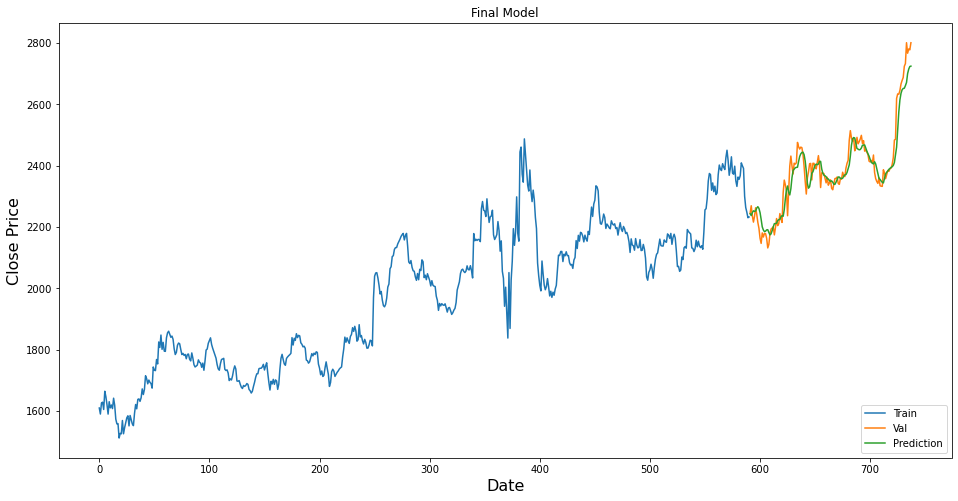

In [19]:
train = data1[:train_data_len]
valid = data1[train_data_len:]
valid['Prediction'] = predict
plt.figure(figsize=(16,8))
plt.title('Final Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [20]:
df2 = pd.read_csv("HINDUNILVR.csv" , encoding = "ISO-8859-1")
new_df = df2.filter(['Close'])
new_df1 = new_df.dropna(how="any")
new_df2 = new_df1.values
data2_len = 342
data2 = new_df2[0:data2_len, :]
data2.shape

(342, 1)

In [21]:
last_days = data2[-p:]
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2141.2207]]


In [22]:
new_df[342:]

,Close
342,2160.300049
343,2156.399902
344,2159.949951
345,2159.300049
346,2152.649902
...,...
733,2801.050049
734,2766.699951
735,2780.600098
736,2777.699951


In [23]:
len(test_data)

277

In [24]:
x_input = test_data[147:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = p
i=0
num = int(input())
while(i<num):
    
    if(len(temp_input)>p):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

20
[[0.9445187449455261], [0.9289379715919495], [0.906249463558197], [0.8807875514030457], [0.855042040348053], [0.8306206464767456], [0.8085976243019104], [0.789657711982727], [0.7741729021072388], [0.7622610330581665], [0.7538371682167053], [0.748663067817688], [0.7463902235031128], [0.7465959191322327], [0.7488150596618652], [0.7525652050971985], [0.7573676109313965], [0.7627649307250977], [0.7683358192443848], [0.7737058997154236]]


In [25]:
output = scaler.inverse_transform(lst_output)
output

array([[2729.5568983 ],
       [2709.47951223],
       [2680.24309855],
       [2647.43287606],
       [2614.25720799],
       [2582.78779745],
       [2554.40892892],
       [2530.00295605],
       [2510.04922852],
       [2494.6995929 ],
       [2483.84459984],
       [2477.17725356],
       [2474.24846615],
       [2474.51352556],
       [2477.37311026],
       [2482.20554804],
       [2488.39392867],
       [2495.34891548],
       [2502.52756298],
       [2509.4474492 ]])

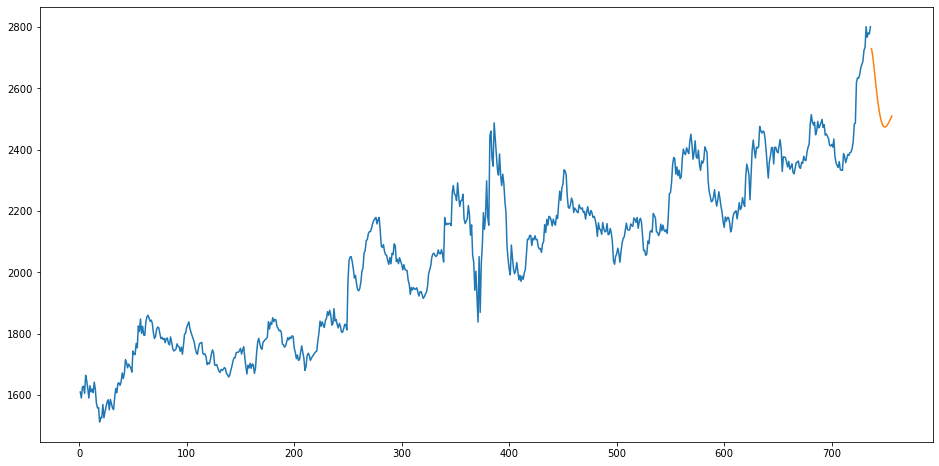

In [26]:
day_new = np.arange(1,737)
day_pred = np.arange(737,737+20)
plt.figure(figsize=(16,8))
plt.plot(day_new,data1[['Close']])
plt.plot(day_pred,output)
plt.show()

In [27]:
y = test_data[147:].reshape(1,-1)
temp1 = list(y)
temp1 = temp1[0].tolist()
lst1 = []
n1 = p
j=0
num = 10
while(j<num):
    
    if(len(temp1)>p):
        y=np.array(temp1[1:])
        y=y.reshape(1,-1)
        y = y.reshape((1, n1, 1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        temp1=temp1[1:]
        lst1.extend(yhat1.tolist())
        j=j+1
    else:
        y = y.reshape((1, n1,1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        lst1.extend(yhat1.tolist())
        j=j+1
    

print(lst1)

[[0.9445187449455261], [0.9289379715919495], [0.906249463558197], [0.8807875514030457], [0.855042040348053], [0.8306206464767456], [0.8085976243019104], [0.789657711982727], [0.7741729021072388], [0.7622610330581665]]


In [28]:
out = scaler.inverse_transform(lst1)
out

array([[2729.5568983 ],
       [2709.47951223],
       [2680.24309855],
       [2647.43287606],
       [2614.25720799],
       [2582.78779745],
       [2554.40892892],
       [2530.00295605],
       [2510.04922852],
       [2494.6995929 ]])

In [29]:
lst2 = out.tolist()
lst2

[[2729.556898299642],
 [2709.479512229307],
 [2680.24309855354],
 [2647.432876055145],
 [2614.257207986621],
 [2582.787797450758],
 [2554.4089289180088],
 [2530.0029560473977],
 [2510.049228524332],
 [2494.6995929003347]]

In [30]:
from itertools import chain

In [31]:
lst3 = list(chain.from_iterable(lst2))
lst3

[2729.556898299642,
 2709.479512229307,
 2680.24309855354,
 2647.432876055145,
 2614.257207986621,
 2582.787797450758,
 2554.4089289180088,
 2530.0029560473977,
 2510.049228524332,
 2494.6995929003347]

In [32]:
def findmin(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==0 and arr[i]<arr[i+1]:
                ans.append((arr[i],i))
            if i==len(arr)-1 and arr[i-1]> arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] >arr[i] and arr[i]< arr[i+1]:
                ans.append((arr[i],i))
    return ans

mn = findmin(lst3)
print(mn)

[(2494.6995929003347, 9)]


In [33]:
def findmax(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==len(arr)-1 and arr[i-1]<arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] <arr[i] and arr[i]> arr[i+1]:
                ans.append((arr[i],i))
    return ans

mx = findmax(lst3)
print(mx)

[]


In [34]:
def maxprofit(mn,mx):
    profit =[]
    for x,i in mn:
        for y,j in mx:
            if y-x>0 and j>i:
                profit.append((i,j,y-x))
    return profit

profit = maxprofit(mn,mx)
print(profit)

[]


In [35]:
def finalProfit(profit):
    mx = -1
    px,py,pro = 0,0,0
    for x,y,p in profit:
        if p>=mx:
            px,py,pro =x,y,p
            mx =p 
    return (px,py,pro)
    
print(finalProfit(profit))

(0, 0, 0)
